# Exploratory Data Analysis - Visualizing Data

Below we will see how to visualize data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Visualization In Python

The standard for basic visualization is a library called matplotlib.  Notice above the use of `%matplotlib inline`, this means that the visualizations matplotlib creates will be shown inline, in the jupyter notebook.  Without this line, seperate visualization files will be generated.

Visualizations in matplotlib are done in one of two ways:

* `pyplot`
* `artist`

Today we will be looking at the `pyplot` interface, but for more advanced or creative visualizations, I would highly recommend checking out the `artist` class.

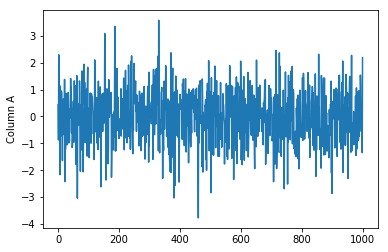

In [7]:
random_data = pd.read_csv("random_data.csv")

plt.ylabel("Column A")
plt.plot(range(len(random_data)), random_data["A"])
plt.show()

As you can see from the above visualization, pyplot makes it easy to visualize any data set, fairly easily.  The visualization methods generally expect some data to populate the x and y values.  And then pyplot will draw the resultant data for you!

Let's look at a few more examples:

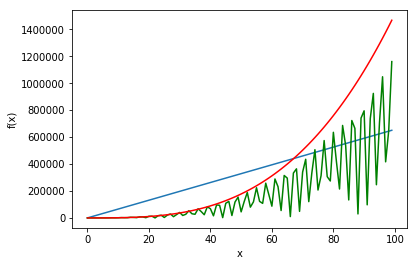

In [55]:
import math

def transform_one(datum):
    return datum*6570

def transform_two(datum):
    return abs(math.pow(datum, 2.8)*math.sin(datum))*3

def transform_three(datum):
    return math.pow(datum, 3.09)

X = list(range(100))
Y_one = [transform_one(elem) for elem in X]
Y_two = [transform_two(elem) for elem in X]
Y_three = [transform_three(elem) for elem in X]

plt.ylabel('f(x)')
plt.xlabel('x')
plt.plot(X, Y_one, '-', X, Y_two, 'g-', X, Y_three, 'r-')

The above is called a scatter plot.  Scatter plots are great for showing the relationship between two variables.  But what if we are only interested in the behavior of one variable?  For this, histograms are best.  They show the distribution of the data across it's range.

c:\users\erschles\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


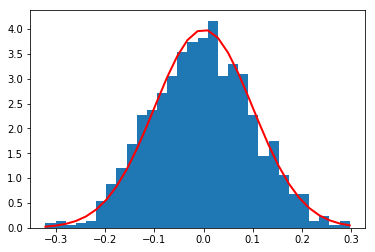

In [77]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
lhs = 1/(sigma * np.sqrt(2 * np.pi))
rhs = np.exp( - (bins - mu)**2 / (2 * sigma**2))
normal_dist = lhs * rhs 
plt.plot(bins, normal_dist,
          linewidth=2, color='r')
plt.show()

Here we visualize the gaussian distribution as well as a sample from the gaussian distribution.  You may know this distribution as the "normal" distribution, because it is used so often and found so often in nature. 

## Optional Material - Central Limit Theorem

The reason this is distribution is so common is because of the central limit theorem.  Which states, that any set of distributions which converge to some shape, such that the variance of the distribution is finite, will converge to a normal distribution, eventually.

What this means is the following:

In [2]:
import random
import scipy.stats as stats

def choose_distribution():
    return random.choice([
        np.random.beta(0.3, 0.5, 10000), 
        np.random.geometric(0.3, 10000), 
        np.random.logistic(0, 1, 10000), 
        np.random.poisson(lam=5, size=10000)]
    )

distribution = choose_distribution()
for _ in range(10):
    distribution = np.concatenate((distribution, choose_distribution()), axis=0)

stats.normaltest(distribution)

NormaltestResult(statistic=17335.785354016643, pvalue=0.0)

Notice - None of those distributions were normal, yet when combined together, they converge to a normal distribution!  This next part is _important_ - it's because the distributions themselves converge and have bounded standard deviations (or spread) that these distributions converge to a normal distribution.